In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf



In [ ]:
messages =pd.read_csv("/Users/lucasbrunner/Desktop/Algo Trading/Project/Data/AAPL_2012-06-21_34200000_57600000_message_10.csv")
messages.columns= ["Time", "Type", "Order ID", "Size", "Price", "Direction"]
base_date = pd.to_datetime("2012-06-21")
messages["Time"] = messages["Time"].apply(lambda x: base_date + pd.to_timedelta(x, unit="s"))

In [14]:
messages

,Time,Type,Order ID,Size,Price,Direction
0,2012-06-21 09:30:00.004260640,1,16113584,18,5853200,1
1,2012-06-21 09:30:00.004447484,1,16113594,18,5853100,1
2,2012-06-21 09:30:00.025551909,1,16120456,18,5859100,-1
3,2012-06-21 09:30:00.025579546,1,16120480,18,5859200,-1
4,2012-06-21 09:30:00.025613151,1,16120503,18,5859300,-1
...,...,...,...,...,...,...
400385,2012-06-21 15:59:59.444019561,1,287150868,48,5776100,-1
400386,2012-06-21 15:59:59.444794893,1,287150931,100,5777200,-1
400387,2012-06-21 15:59:59.625827171,3,286898608,100,5774900,1
400388,2012-06-21 15:59:59.913117637,4,287150868,48,5776100,-1


In [19]:
orderbook=pd.read_csv("/Users/lucasbrunner/Desktop/Algo Trading/Project/Data/AAPL_2012-06-21_34200000_57600000_orderbook_10.csv")
orderbook.columns=["Ask Price 1", "Ask Size 1", "Bid Price 1", "Bid Size 1",
                   "Ask Price 2", "Ask Size 2", "Bid Price 2", "Bid Size 2",
                   "Ask Price 3", "Ask Size 3", "Bid Price 3", "Bid Size 3",
                   "Ask Price 4", "Ask Size 4", "Bid Price 4", "Bid Size 4",
                   "Ask Price 5", "Ask Size 5", "Bid Price 5", "Bid Size 5",
                   "Ask Price 6", "Ask Size 6", "Bid Price 6", "Bid Size 6",
                   "Ask Price 7", "Ask Size 7", "Bid Price 7", "Bid Size 7",
                   "Ask Price 8", "Ask Size 8", "Bid Price 8", "Bid Size 8",
                   "Ask Price 9", "Ask Size 9", "Bid Price 9", "Bid Size 9",
                   "Ask Price 10", "Ask Size 10", "Bid Price 10", "Bid Size 10"]

In [22]:
orderbook

,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,Bid Price 2,Bid Size 2,Ask Price 3,Ask Size 3,...,Bid Price 8,Bid Size 8,Ask Price 9,Ask Size 9,Bid Price 9,Bid Size 9,Ask Price 10,Ask Size 10,Bid Price 10,Bid Size 10
0,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5846500,300,5876500,1160,5845300,300,5879000,500,5843800,200
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,5849300,300,5876500,1160,5846500,300,5879000,500,5845300,300
2,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,5849300,300,5873900,100,5846500,300,5876500,1160,5845300,300
3,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,5849300,300,5871000,10,5846500,300,5873900,100,5845300,300
4,5859100,18,5853300,18,5859200,18,5853200,18,5859300,18,...,5849300,300,5870000,100,5846500,300,5871000,10,5845300,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400385,5776100,48,5775400,410,5776700,300,5775300,1400,5776800,200,...,5774600,100,5777600,100,5774500,200,5777700,100,5774300,100
400386,5776100,48,5775400,410,5776700,300,5775300,1400,5776800,200,...,5774600,100,5777500,600,5774500,200,5777600,100,5774300,100
400387,5776100,48,5775400,410,5776700,300,5775300,1400,5776800,200,...,5774600,100,5777500,600,5774500,200,5777600,100,5774300,100
400388,5776700,300,5775400,410,5776800,200,5775300,1400,5776900,160,...,5774600,100,5777600,100,5774500,200,5777800,200,5774300,100


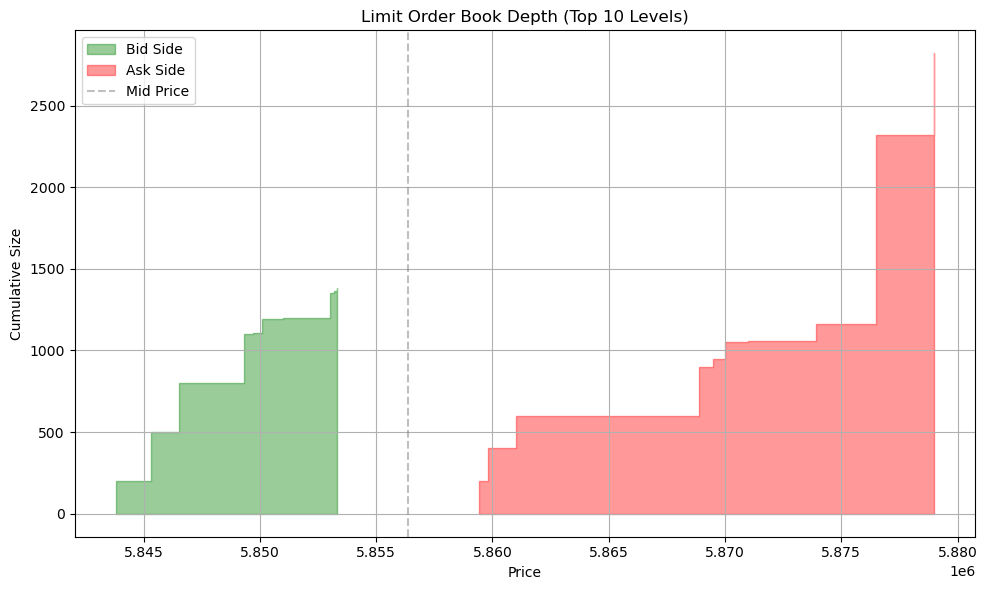

In [34]:
snapshot = orderbook.iloc[0]
ask_prices = np.array([
    snapshot["Ask Price 1"], snapshot["Ask Price 2"], snapshot["Ask Price 3"],
    snapshot["Ask Price 4"], snapshot["Ask Price 5"], snapshot["Ask Price 6"],
    snapshot["Ask Price 7"], snapshot["Ask Price 8"], snapshot["Ask Price 9"],
    snapshot["Ask Price 10"]
])

ask_sizes = np.array([
    snapshot["Ask Size 1"], snapshot["Ask Size 2"], snapshot["Ask Size 3"],
    snapshot["Ask Size 4"], snapshot["Ask Size 5"], snapshot["Ask Size 6"],
    snapshot["Ask Size 7"], snapshot["Ask Size 8"], snapshot["Ask Size 9"],
    snapshot["Ask Size 10"]
])

bid_prices = np.array([
    snapshot["Bid Price 1"], snapshot["Bid Price 2"], snapshot["Bid Price 3"],
    snapshot["Bid Price 4"], snapshot["Bid Price 5"], snapshot["Bid Price 6"],
    snapshot["Bid Price 7"], snapshot["Bid Price 8"], snapshot["Bid Price 9"],
    snapshot["Bid Price 10"]
])

bid_sizes = np.array([
    snapshot["Bid Size 1"], snapshot["Bid Size 2"], snapshot["Bid Size 3"],
    snapshot["Bid Size 4"], snapshot["Bid Size 5"], snapshot["Bid Size 6"],
    snapshot["Bid Size 7"], snapshot["Bid Size 8"], snapshot["Bid Size 9"],
    snapshot["Bid Size 10"]
])

# --- Compute cumulative sizes ---
cumulative_ask = np.cumsum(ask_sizes)
cumulative_bid = np.cumsum(bid_sizes[::-1])[::-1]  # reverse for descending bid side

bid_prices_sorted = bid_prices[::-1]
cumulative_bid_sorted = cumulative_bid[::-1]

# Plot with fill_between
plt.figure(figsize=(10, 6))

# Bid side (green, left)
plt.fill_between(bid_prices_sorted, cumulative_bid_sorted, step='post', color='green', alpha=0.4, label='Bid Side')

# Ask side (red, right)
plt.fill_between(ask_prices, cumulative_ask, step='post', color='red', alpha=0.4, label='Ask Side')

# Midprice line (optional)
mid_price = (ask_prices[0] + bid_prices[0]) / 2
plt.axvline(mid_price, color='gray', linestyle='--', alpha=0.5, label='Mid Price')

# Labels and style
plt.xlabel("Price")
plt.ylabel("Cumulative Size")
plt.title("Limit Order Book Depth (Top 10 Levels)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Green fill** on the left → Cumulative bid liquidity

**Red fill** on the right → Cumulative ask liquidity

**Gap in the middle** → Bid-ask spread

**Vertical dashed line** → Mid-price indicator

**Interpretatoin**

The higher the walls → the more liquidity at that level

A steep cliff or spike → large orders stacked at that price

A deep valley in the middle → wide spread, thin liquidity near market price

Mid-price helps you see where the market currently is

In [35]:
imbalance = cumulative_bid[-1] / (cumulative_bid[-1] + cumulative_ask[-1])
print(f"Order book imbalance: {imbalance:.2f}")


Order book imbalance: 0.07


[*********************100%***********************]  1 of 1 completed

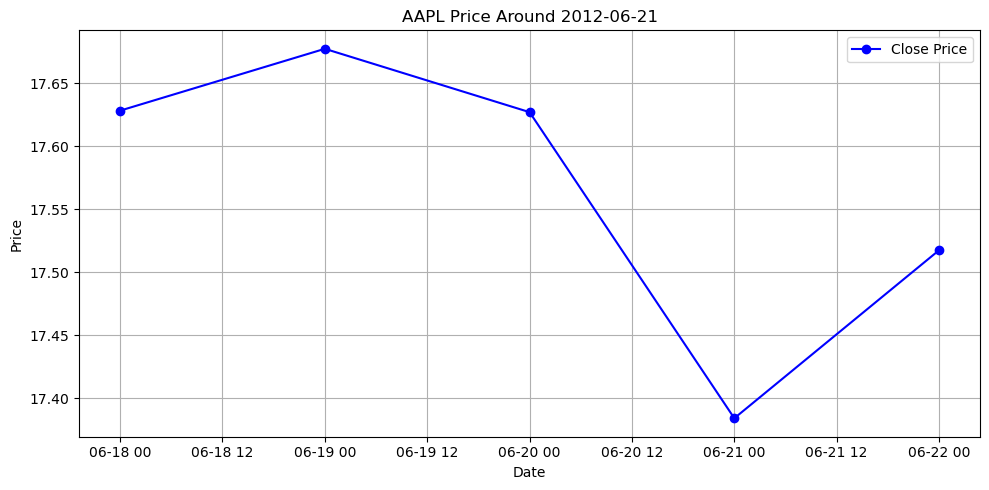

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Choose your ticker and date
ticker = "AAPL"
date = "2012-06-21"

# Download data
data = yf.download(ticker, start="2012-06-18", end="2012-06-23")

# Ensure index is datetime
data.index = pd.to_datetime(data.index)

# Convert the string date to a Timestamp
target_date = pd.Timestamp(date)

# Plot closing price
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], marker='o', label='Close Price', color='blue')



# Labels and legend
plt.title(f"{ticker} Price Around {date}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Since there was an inbalance in ask and bid price. Which means more people wanted to sell the price dropped on the 06.21.2012